# Prophet model from facebook to be used in time series analysis

In [1]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

C:\Users\adeel\AppData\Local\Temp\ipykernel_7248\2091634592.py:2: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
# import the dataset
df = pd.read_csv("D:\Drive D\One drive folder\OneDrive - Higher Education Commission\Drive G\Data science coding\Data sets\Daily climate data\DailyDelhiClimateTrain.csv", index_col="date", parse_dates=True)
print(df.head())

             meantemp   humidity  wind_speed  meanpressure
date                                                      
2013-01-01  10.000000  84.500000    0.000000   1015.666667
2013-01-02   7.400000  92.000000    2.980000   1017.800000
2013-01-03   7.166667  87.000000    4.633333   1018.666667
2013-01-04   8.666667  71.333333    1.233333   1017.166667
2013-01-05   6.000000  86.833333    3.700000   1016.500000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1462 entries, 2013-01-01 to 2017-01-01
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   meantemp      1462 non-null   float64
 1   humidity      1462 non-null   float64
 2   wind_speed    1462 non-null   float64
 3   meanpressure  1462 non-null   float64
dtypes: float64(4)
memory usage: 57.1 KB


In [4]:
df.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,25.495521,60.771702,6.802209,1011.104548
std,7.348103,16.769652,4.561602,180.231668
min,6.000000,13.428571,0.000000,-3.041667
25%,18.857143,50.375000,3.475000,1001.580357
50%,27.714286,62.625000,6.221667,1008.563492
75%,31.305804,72.218750,9.238235,1014.944901
max,38.714286,100.000000,42.220000,7679.333333


<Axes: xlabel='date', ylabel='meantemp'>

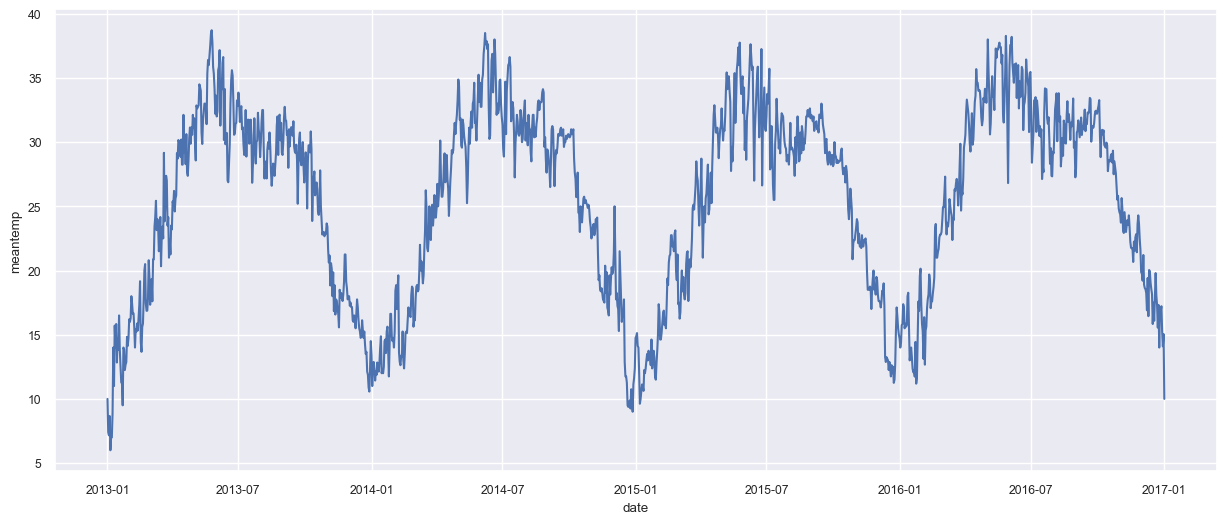

In [5]:
# draw a line plot
sns.set(rc={'figure.figsize':(15, 6)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df, x="date", y="meantemp")


<Axes: xlabel='date', ylabel='humidity'>

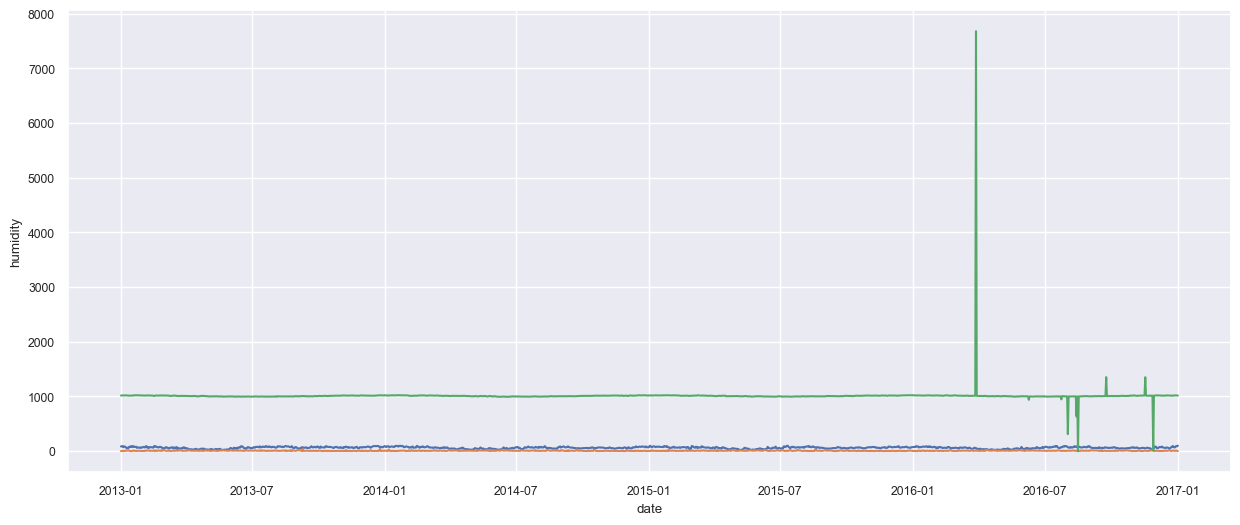

In [6]:
sns.lineplot(data=df, x="date", y="humidity")
sns.lineplot(data=df, x="date", y="wind_speed")
sns.lineplot(data=df, x="date", y="meanpressure")

In [7]:
# draw same plot on plotly
fig = px.line(df, x=df.index, y="meanpressure", title='Mean Pressure')
fig.show()

In [8]:
# interpolate the outliers from mean pressure column on 28.March.2016
df.loc['2016-03-28', 'meanpressure'] = np.nan
df['meanpressure'] = df['meanpressure'].interpolate(method='time')
df.loc['2016-03-28']

meantemp          25.933333
humidity          52.800000
wind_speed         6.546667
meanpressure    1012.062500
Name: 2016-03-28 00:00:00, dtype: float64

In [9]:
fig = px.line(df, x=df.index, y="meanpressure", title='Mean Pressure')
fig.show()

In [10]:
df.columns

Index(['meantemp', 'humidity', 'wind_speed', 'meanpressure'], dtype='object')

In [11]:
fig = px.line(df, x=df.index, y="meantemp", title='Mean temperature')
fig.show()

In [12]:
fig1=px.scatter(df, x="meantemp", y="humidity", title='Mean temperature vs Humidity', 
                trendline='ols', trendline_color_override='red')
fig1.show()

In [13]:
from scipy.stats import pearsonr
pearsonr(df['meantemp'], df['humidity'])

PearsonRResult(statistic=-0.5719507155817221, pvalue=8.965893710176129e-128)

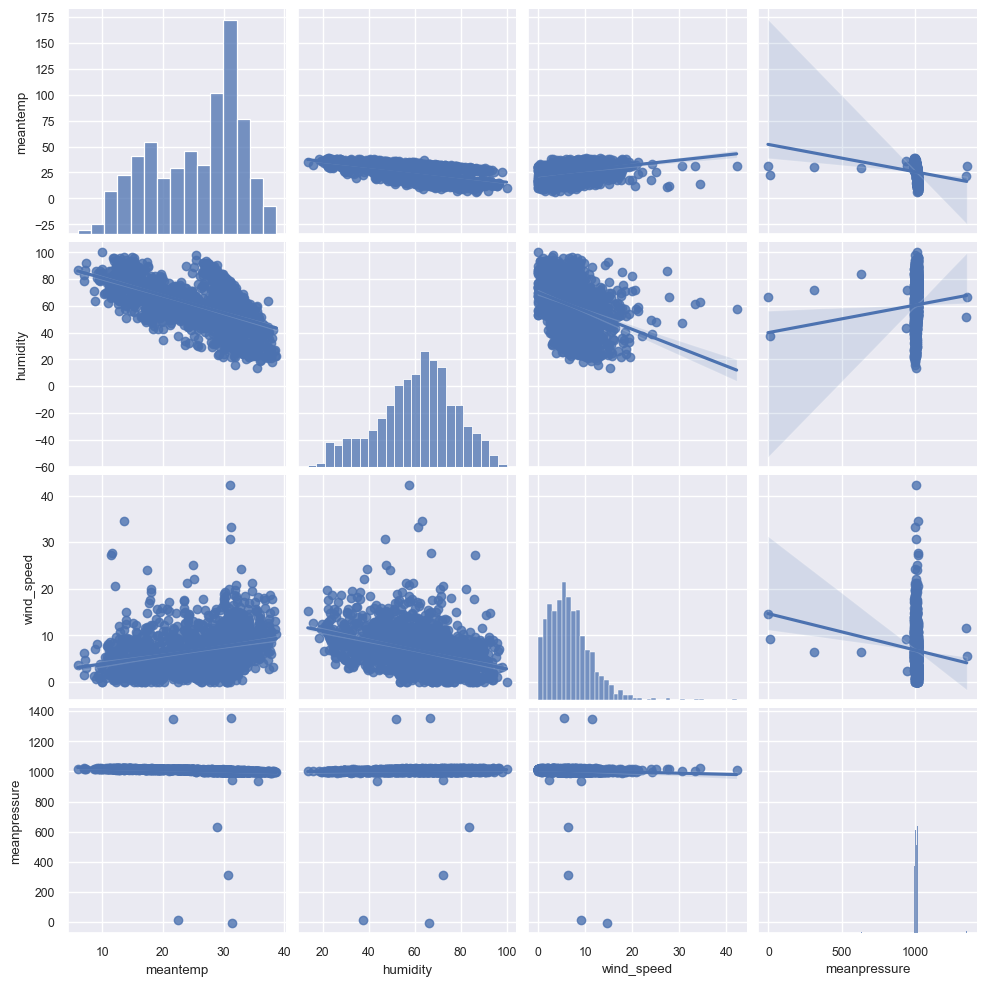

In [14]:
sns.pairplot(df, kind='reg')

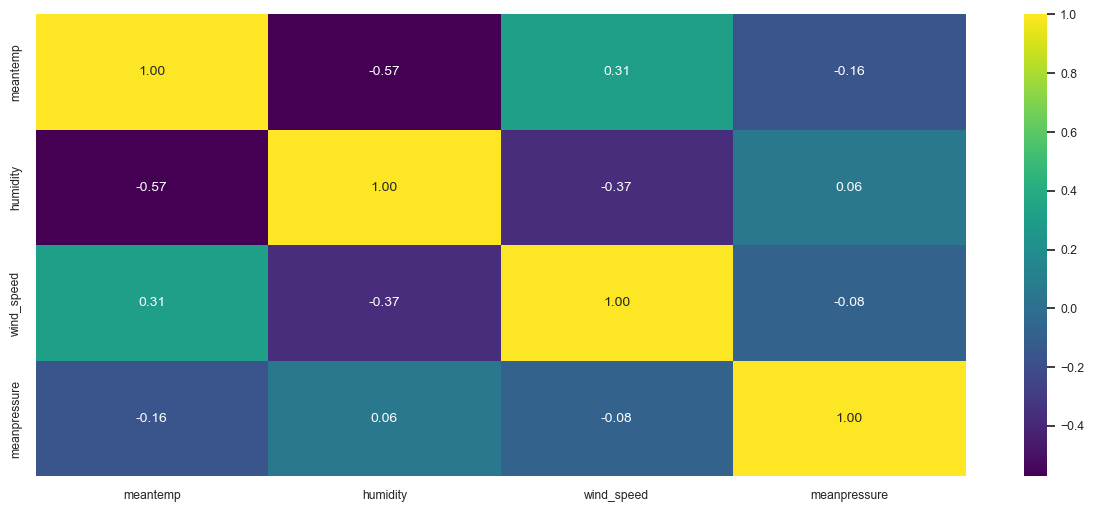

In [15]:
ax = sns.heatmap(df.corr(), annot=True, fmt=".2f", annot_kws={"size": 10}, cmap="viridis")

In [16]:
# pip install seaborn==13.0

In [17]:
# scale the data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df), columns=df.columns, index=df.index)
df_scaled.describe()

,meantemp,humidity,wind_speed,meanpressure
count,1462.000000,1462.000000,1462.000000,1462.000000
mean,0.595933,0.546868,0.161113,0.744721
std,0.224614,0.193709,0.108044,0.033217
min,0.000000,0.000000,0.000000,0.000000
25%,0.393013,0.426774,0.082307,0.741059
50%,0.663755,0.568276,0.147363,0.746210
75%,0.773540,0.679094,0.218812,0.750900
max,1.000000,1.000000,1.000000,1.000000


<Axes: xlabel='date', ylabel='meantemp'>

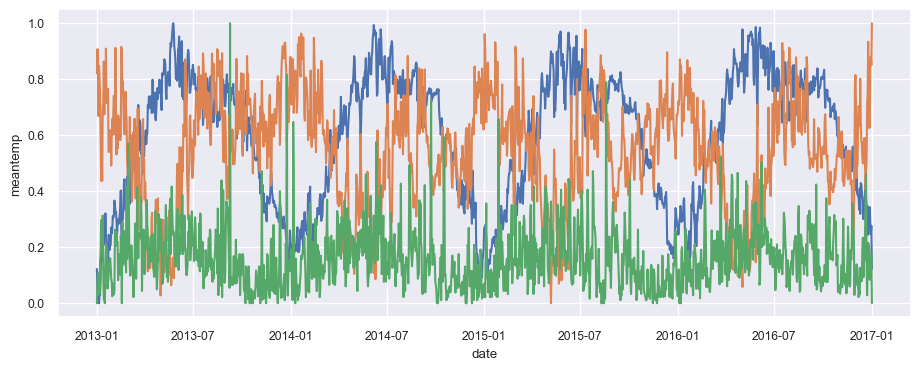

In [18]:
# draw a line plot
sns.set(rc={'figure.figsize':(11, 4)}, font_scale=0.8, style='darkgrid')
sns.lineplot(data=df_scaled, x="date", y="meantemp")
sns.lineplot(data=df_scaled, x="date", y="humidity")
sns.lineplot(data=df_scaled, x="date", y="wind_speed")
# sns.lineplot(data=df_scaled, x="date", y="meanpressure")

In [19]:
# add two columns in the dataset for month and year
df_scaled['month'] = df_scaled.index.month
df_scaled['year'] = df_scaled.index.year
df_scaled.head()

,meantemp,humidity,wind_speed,meanpressure,month,year
date,,,,,,
2013-01-01,0.122271,0.820957,0.000000,0.751450,1,2013
2013-01-02,0.042795,0.907591,0.070583,0.753024,1,2013
2013-01-03,0.035662,0.849835,0.109743,0.753663,1,2013
2013-01-04,0.081514,0.668867,0.029212,0.752556,1,2013
2013-01-05,0.000000,0.847910,0.087636,0.752065,1,2013


In [20]:
df_scaled['year'].unique()

array([2013, 2014, 2015, 2016, 2017])

(1.0, 12.0)

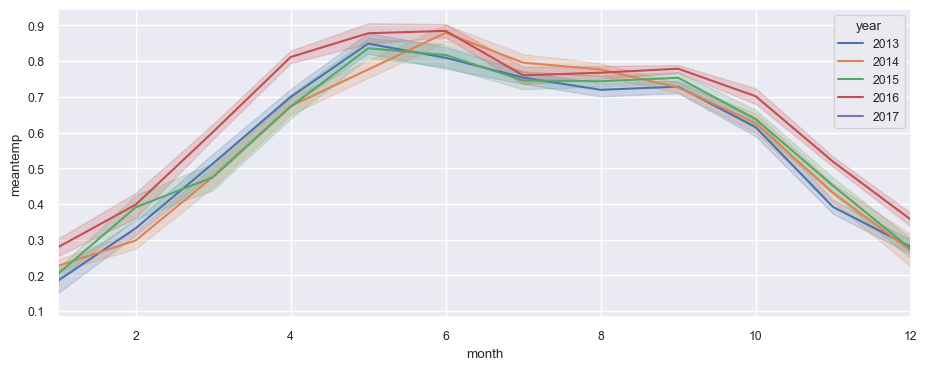

In [23]:
sns.lineplot(data=df_scaled, x="month", y="meantemp", hue="year", palette='deep')
plt.xlim(1, 12)

In [24]:
# same in plotly
fig = px.line(df_scaled, x=df_scaled.index , y="meantemp", color="year", title='Mean Temperature by Month')
fig.show()

In [28]:
df['month'] = df.index.month
df['year'] = df.index.year
fig = px.line(df, x=df.index , y="meantemp", color="year", title='Mean Temperature by Month')
fig.show()